In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

In [2]:
wine = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
wine['quality_gb'] = wine.quality>7

In [5]:
wine.quality_gb

0       False
1       False
2       False
3       False
4       False
        ...  
1594    False
1595    False
1596    False
1597    False
1598    False
Name: quality_gb, Length: 1599, dtype: bool

In [6]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_gb
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False


In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = wine.drop(labels=['quality','quality_gb'], axis = 1)
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
rfc_eval

array([0.66796875, 0.69140625, 0.6484375 , 0.6875    , 0.73333333])

<AxesSubplot:>

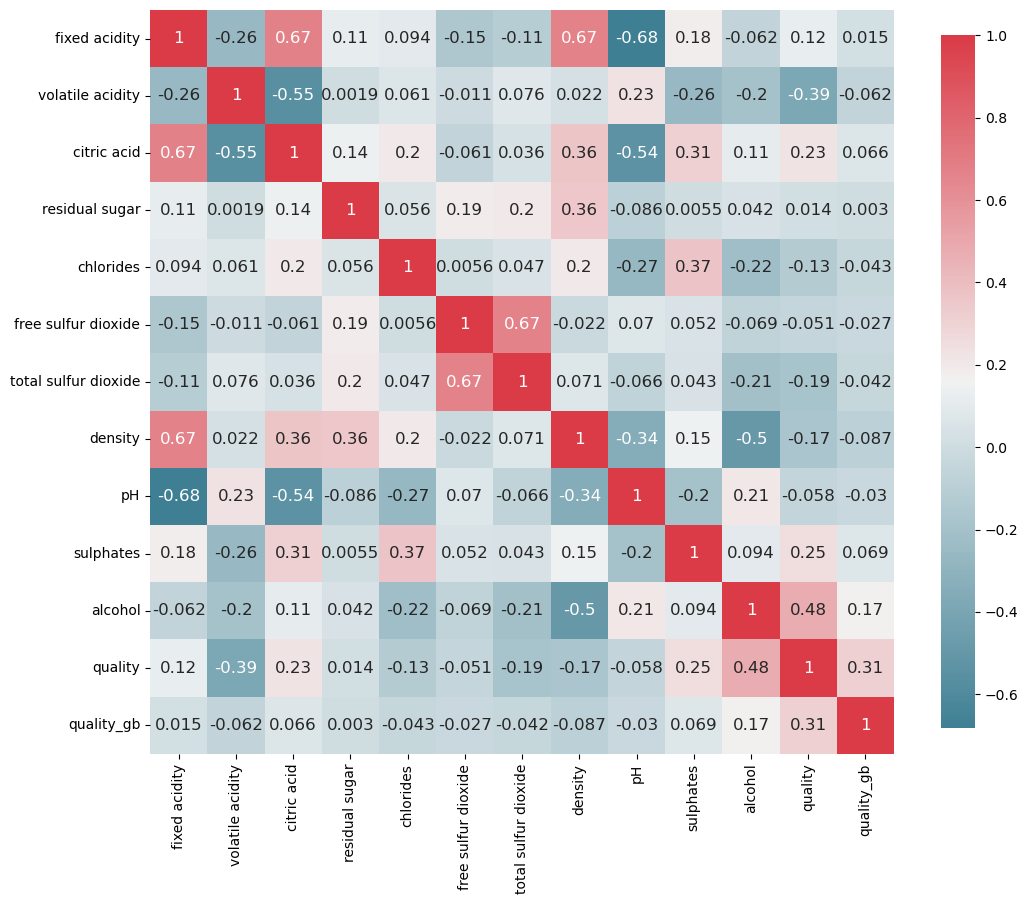

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = wine.corr()
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax = plt.subplots( figsize =( 12 , 10 ) )[1],
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
)

In [9]:
wine.drop(labels='density', axis=1, inplace=True) #dropped 'density' column

In [10]:
wine.drop(labels='quality_gb', axis=1, inplace=True)

In [11]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5


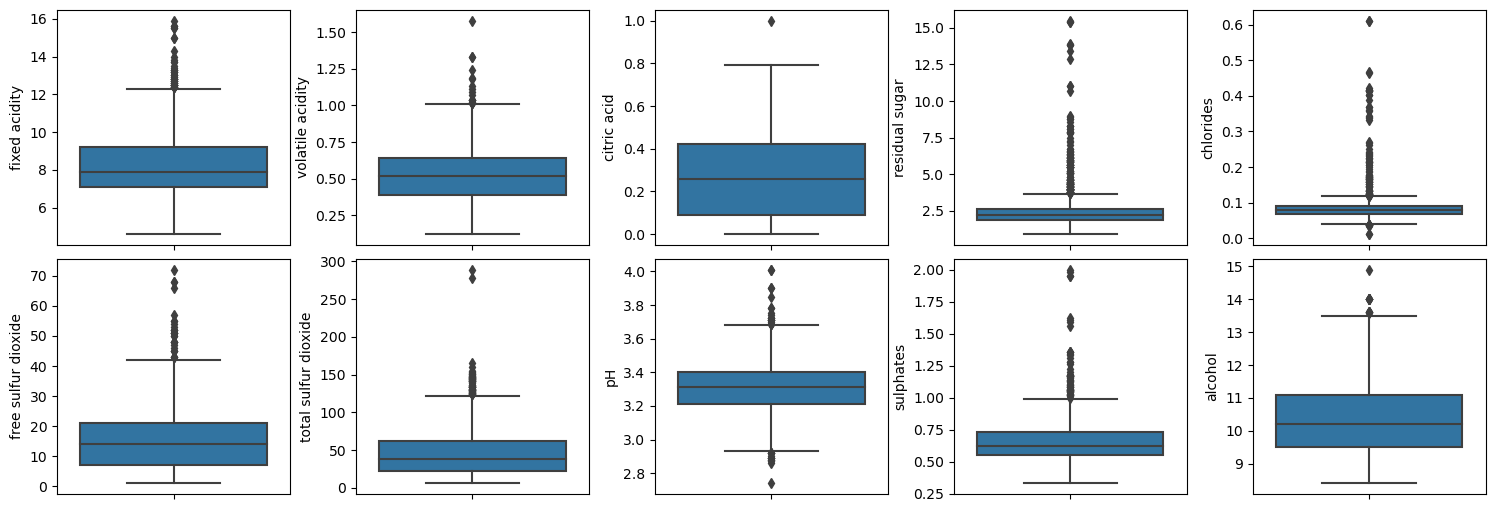

In [12]:
#Plotting boxplots to see if there are any outliers in our data (considering data betwen 25th and 75th percentile as non outlier)
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in wine.columns:
  if i != 'quality':
    sns.boxplot(y=i, data=wine, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.4)
plt.show()

In [13]:
#for another view, this method can be used to view correlations
print('Another view of correlations among features:\n')
wine.corr().style.background_gradient(cmap="coolwarm")


Another view of correlations among features:



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,-0.066495,0.042947,-0.205654,-0.185100
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,-0.196648,1.000000,0.093595,0.251397
alcohol,-0.061668,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.205654,0.205633,0.093595,1.000000,0.476166


In [14]:
dataset = wine

In [15]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
dataset['quality'] = pd.cut(dataset['quality'], bins = bins, labels = group_names)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,bad


In [16]:
dataset['quality'] = dataset['quality'].map({'bad' : 0, 'good' : 1})
dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,3.35,0.80,10.5,0


0    1382
1     217
Name: quality, dtype: int64


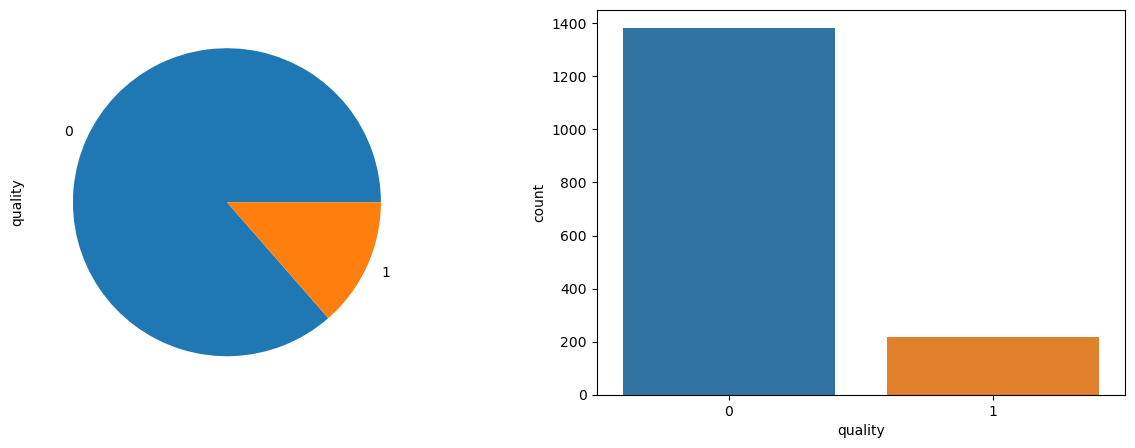

In [17]:
print(dataset['quality'].value_counts())
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))
ax = ax.flatten()
dataset['quality'].value_counts().plot(x=0, y=1, kind='pie', figsize=(15,5), ax=ax[0])
sns.countplot(x='quality', data = dataset)
plt.show()

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = dataset.drop('quality', axis = 1)
y = dataset['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
rfc_eval

array([0.87890625, 0.92578125, 0.87109375, 0.93359375, 0.91764706])

In [19]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# logistic regression 
log = LogisticRegression(random_state=0)
scores_1 = cross_val_score(log, X_train, y_train.values.ravel(),cv=5,scoring='accuracy').mean()

# Support Vector Machines
svc = SVC()
scores_2 = cross_val_score(svc, X_train, y_train.values.ravel(),cv=5,scoring='accuracy').mean()

# Decision Tree
decision_tree = DecisionTreeClassifier()
scores_3 = cross_val_score(decision_tree, X_train, y_train.values.ravel(),cv=5,scoring='accuracy').mean()

# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
scores_4 = cross_val_score(knn, X_train, y_train.values.ravel(),cv=5,scoring='accuracy').mean()

# Gaussian Naive Baye
gaussian = GaussianNB()
scores_5 = cross_val_score(gaussian, X_train, y_train.values.ravel(),cv=5,scoring='accuracy').mean()

# RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
scores_6 = cross_val_score(rf, X_train, y_train.values.ravel(),cv=5,scoring='accuracy').mean()

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [20]:
models = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Support Vector Machines',
              'Decision Tree',
              'KNN',  
              'Naive Bayes',
              'RandomForestClassifier' ],
    'Score': [scores_1, scores_2, scores_3, scores_4, scores_5, scores_6]})

models

,Model,Score
0,Logistic Regression,0.881158
1,Support Vector Machines,0.867083
2,Decision Tree,0.863199
3,KNN,0.865515
4,Naive Bayes,0.841281
5,RandomForestClassifier,0.905404


In [21]:
from sklearn.model_selection import GridSearchCV

svc = SVC()
Parameters = {
    'C' : [ 1.5, 2, 2.5],
    'gamma' : [0.05,0.1],
    'kernel' : ['rbf']
}

clf= GridSearchCV(svc, Parameters, cv = 5, n_jobs = 6)
clf.fit(X_train, y_train)
print(clf.best_params_)
# Result: C = 2, gamma = 0.1 if using Gaussian Kernel

scores_7 = cross_val_score(svc, X_train, y_train.values.ravel(), cv=5,scoring='accuracy').mean()
print(scores_7)

{'C': 1.5, 'gamma': 0.05, 'kernel': 'rbf'}
0.8670833333333334


In [22]:
rf = RandomForestClassifier(n_estimators=100)
Parameters = {
  'max_depth' : [6, 8],
  'n_estimators': [50, 10],
  'max_features': ['sqrt', 'auto'],
  'min_samples_split': [3, 10],
  'min_samples_leaf': [3, 10],
  'bootstrap': [True, False],
}

rf = GridSearchCV(rf, Parameters,cv = 5)
scores_8 = cross_val_score(rf, X_train, y_train.values.ravel(),cv=5,scoring='accuracy').mean()
print(scores_8)

0.8913357843137255


In [23]:
models = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Support Vector Machines',
              'Decision Tree',
              'KNN',  
              'Naive Bayes',
              'RandomForestClassifier',
              'Support Vector Machines  (Opt)',
              'RandomForestClassifier (Opt)'
              ],
    'Score': [scores_1, scores_2, scores_3, scores_4, scores_5, scores_6, scores_7, scores_8]})

models

,Model,Score
0,Logistic Regression,0.881158
1,Support Vector Machines,0.867083
2,Decision Tree,0.863199
3,KNN,0.865515
4,Naive Bayes,0.841281
5,RandomForestClassifier,0.905404
6,Support Vector Machines (Opt),0.867083
7,RandomForestClassifier (Opt),0.891336


In [24]:
import tensorflow as tf
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=2)

print(y_train_onehot.shape)
print(y_test_onehot.shape)

(1279, 2)
(320, 2)


In [25]:
import torch
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

# 創建模型架構
class Model(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size)
        self.hidden2 = torch.nn.Linear(hidden_size, hidden_size)
        self.predict = torch.nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        output1 = self.hidden1(x)
        output2 = self.hidden2(output1)
        output = F.softmax(self.predict(output2))
        return output

# 模型、優化器初始化
model = Model(X_test.shape[1], 32, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.0) # 模型參數優化器
loss_func = torch.nn.CrossEntropyLoss()


# 資料格式轉成torch專用格式
x_data = torch.tensor(X_train.values, dtype=torch.float32) # [120, 4]
y_data = torch.tensor(y_train_onehot, dtype=torch.float32) # [120, 3]
x_test_data = torch.tensor(X_test.values, dtype=torch.float32) # [120, 4]
y_test_data = torch.tensor(y_test_onehot, dtype=torch.float32) # [120, 3]


batch_size = 16
num_epochs = 100
num_batches = len(X_train) // batch_size
loss_list = []
test_loss_list = []

for epoch in range(num_epochs):
    for i in range(num_batches):
        start = i * batch_size
        end = start + batch_size
        prediction = model(x_data[start:end])
        loss = loss_func(prediction, y_data[start:end])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss = loss_func(model(x_data), y_data)
    loss_list.append(loss.item())

    test_loss = loss_func(model(x_test_data), y_test_data)
    test_loss_list.append(test_loss.item())

    # print(loss)

print(' ===== done =====')

print(loss_list)
print(test_loss_list)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


 ===== done =====
[0.4477883577346802, 0.4470592737197876, 0.446797639131546, 0.44666051864624023, 0.4465753436088562, 0.4465169310569763, 0.44647416472435, 0.4464414417743683, 0.4464154839515686, 0.4463944435119629, 0.4463769793510437, 0.446362167596817, 0.446349561214447, 0.44633859395980835, 0.4463289976119995, 0.44632047414779663, 0.44631296396255493, 0.4463061988353729, 0.44630008935928345, 0.4462946057319641, 0.4462895393371582, 0.4462849497795105, 0.44628071784973145, 0.44627684354782104, 0.44627320766448975, 0.4462698698043823, 0.4462667405605316, 0.4462638795375824, 0.44626113772392273, 0.4462585747241974, 0.44625619053840637, 0.4462539255619049, 0.446251779794693, 0.4462498426437378, 0.4462478458881378, 0.44624611735343933, 0.44624438881874084, 0.4462427794933319, 0.44624125957489014, 0.44623976945877075, 0.44623827934265137, 0.4462369978427887, 0.446235716342926, 0.4462345242500305, 0.4462333619594574, 0.44623222947120667, 0.4462311267852783, 0.44623008370399475, 0.446229040

Text(0, 0.5, 'BCE Loss')

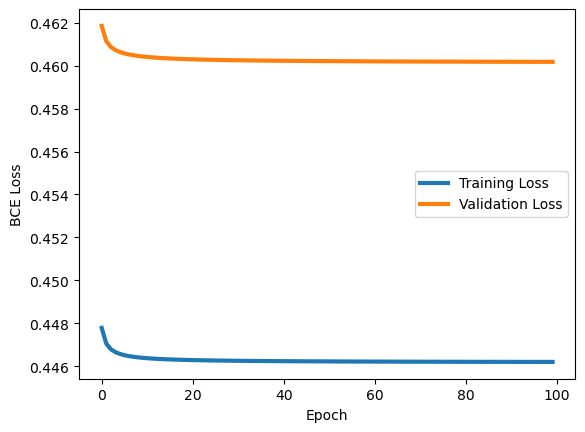

In [26]:
import matplotlib.pyplot as plt
plt.plot(loss_list, linewidth=3)
plt.plot(test_loss_list, linewidth=3)
plt.legend(("Training Loss", "Validation Loss"))
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")

In [27]:
x_test_data = torch.tensor(X_test.values, dtype=torch.float32)
y_pred = model(x_test_data)
y_pred = y_pred.argmax(1) # one hot array to int array
accuracy_score(y_test, y_pred.detach().numpy()) # accuracy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


0.853125